# 第I部
# 第4章 母集団と標本

In [1]:
options(repr.plot.width = 4, repr.plot.height = 4)

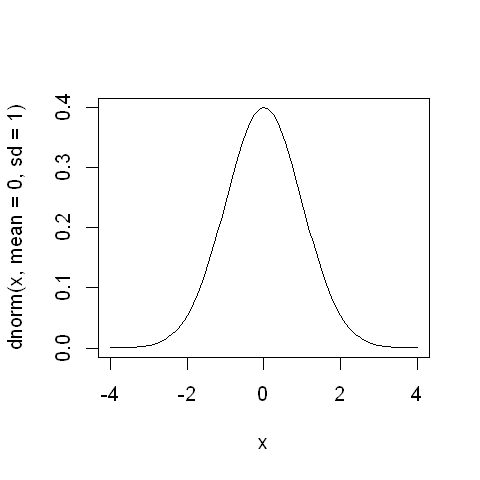

In [2]:
curve(dnorm(x,mean=0,sd=1),from=-4,to=4)

In [3]:
library(ggplot2)

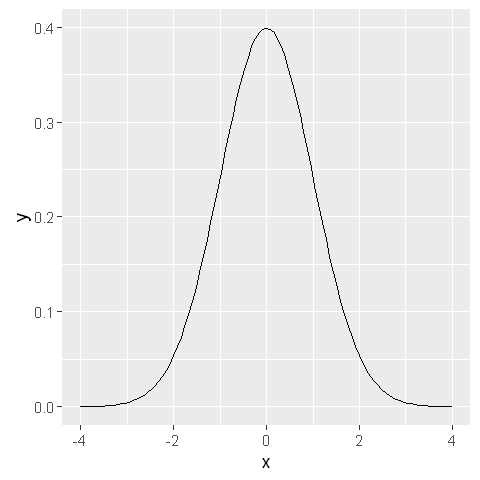

In [4]:
ggplot(data.frame(x = c(-4, 4)), aes(x)) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = 1))

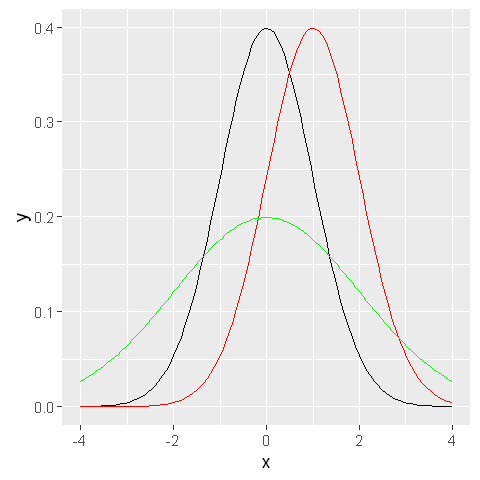

In [5]:
last_plot() +  
    stat_function(fun = dnorm, args = list(mean = 1, sd = 1), colour = "red") + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = 2), colour = "green")

Warning message:
: Removed 68 rows containing missing values (geom_area).

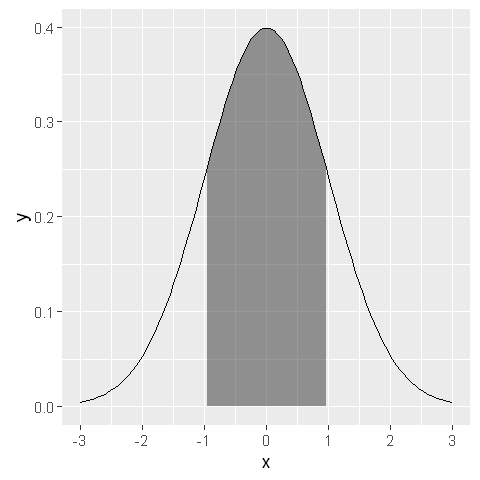

In [6]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) + 
    stat_function(fun=function(x){y <- dnorm(x); y[x < -1|  x > 1] <- NA; return(y);} , geom="area", alpha = 0.5) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = 1)) + 
    scale_x_continuous(breaks = c(-3:3, 1))

* 正規分布の確率密度関数

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}\exp\left(\frac{-(x - \mu)^2}{2\sigma^2}\right)$$

### 4.4.7

* 小標本の場合

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


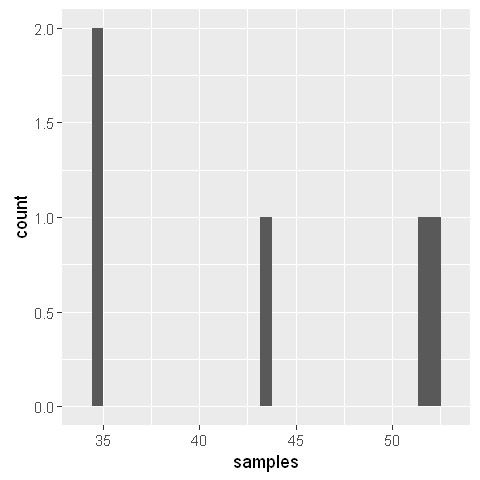

In [7]:
samples = rnorm(n = 5, mean = 50, sd = 10)
ggplot(data.frame(samples), aes(x = samples)) + 
    geom_histogram()

* 大標本の場合

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


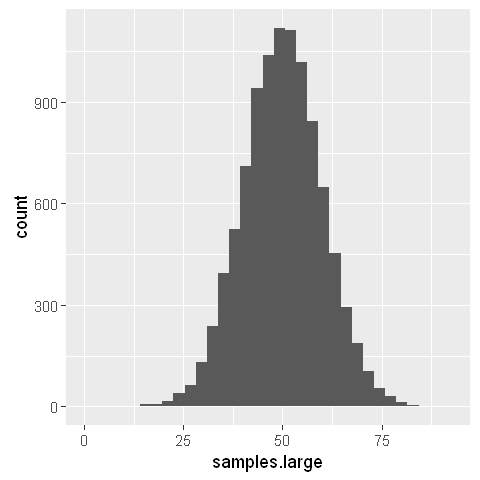

In [8]:
samples.large <- rnorm(n = 10000, mean = 50, sd = 10)
ggplot(data.frame(samples.large), aes(x = samples.large)) + 
    geom_histogram()

## 4.5 標本分布

### 4.5.3

In [9]:
for (i in 1:3) {
    x <- rnorm(n = 10, mean = 50, sd = 10)
    print(mean(x))
}

[1] 48.97004
[1] 51.73457
[1] 50.53473


### 4.5.4

In [10]:
sample_means <- numeric(length = 10000)
for(i in 1:10000){
    x <- rnorm(n = 10, mean = 50, sd = 10)
    sample_means[i] <- mean(x)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


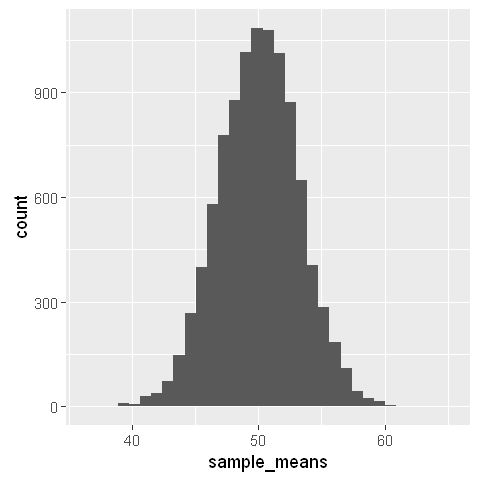

In [11]:
ggplot(data.frame(sample_means), aes(x = sample_means)) + 
    geom_histogram()

* 誤差絶対値5以下

In [12]:
library(pipeR)

In [13]:
abs(sample_means - 50) %>>% 
    sapply(function(x){ifelse(x <= 5, 1, 0)}) %>>%
    table()

.
   0    1 
1132 8868 

$N(\mu, \sigma^2)$ の母集団からn標本を抽出したとき，標本平均の標本分布は $N(\mu, \frac{\sigma^2}{n})$ となる．  
つまり，$N(50, 10^2)$ から n = 10 抽出すると， $N(50, 10^2 / 10) = N(50, 10)$ となる 

In [14]:
mean(sample_means)

[1] 50.03651

In [15]:
var(sample_means)

[1] 10.0015

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


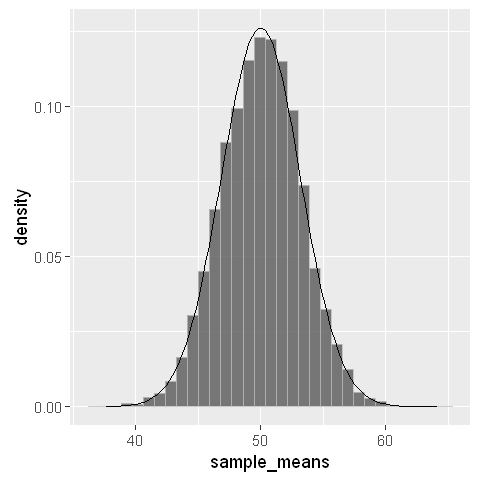

In [16]:
ggplot(data.frame(sample_means), aes(x = sample_means)) + 
    geom_histogram(aes(y = ..density..), col = "gray", alpha = 0.8) + 
    stat_function(fun = dnorm, args = list(mean = 50, sd = sqrt(10)))

### 4.5.6 標準誤差

* 標準誤差: 推定量の標本分布の標準偏差
* $N(\mu, \sigma^2)$ の母集団からn標本を抽出したとき，標本平均の標本分布は $N(\mu, \frac{\sigma^2}{n})$ となるので，
標準誤差は $\frac{\sigma}{\sqrt{n}}$ となる．  

In [17]:
sample_means <- numeric(length = 10000)
for(i in 1:10000){
    x <- rnorm(n = 100, mean = 50, sd = 10)
    sample_means[i] <- mean(x)
}

In [18]:
var(sample_means)

[1] 1.01446

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


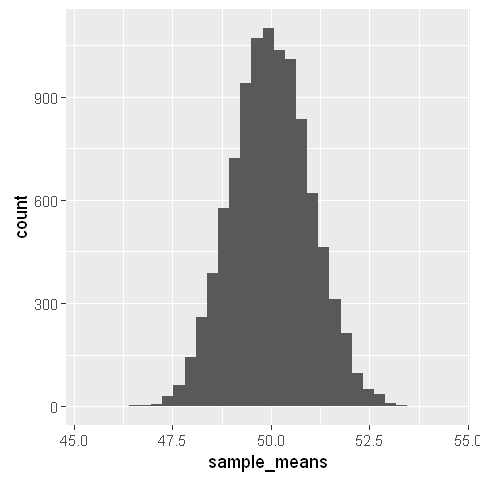

In [19]:
ggplot(data.frame(sample_means), aes(x = sample_means)) + 
    geom_histogram()

## 4.6

* 母分散の推定量は不偏分散のほうが良い

In [20]:
varps <- numeric(length = 10^4)
vars <- numeric(length = 10^4)
for (i in 1:10^4) {
    x <- rnorm(n = 10, mean = 50, sd = 10)
    varps[i] <- mean((x - mean(x))^2)
    vars[i] <- var(x)
}

標本分散

In [21]:
mean(varps)

[1] 90.53715

不偏分散

In [22]:
mean(vars)

[1] 100.5968

* 不偏分散のほうがばらつきが大きい

In [23]:
sd(varps)

[1] 42.80627

In [24]:
sd(vars)

[1] 47.56252

In [25]:
library(tidyr)

In [26]:
library(Cairo)

In [27]:
options(repr.plot.width = 8, repr.plot.height = 4)

pdf 
  2

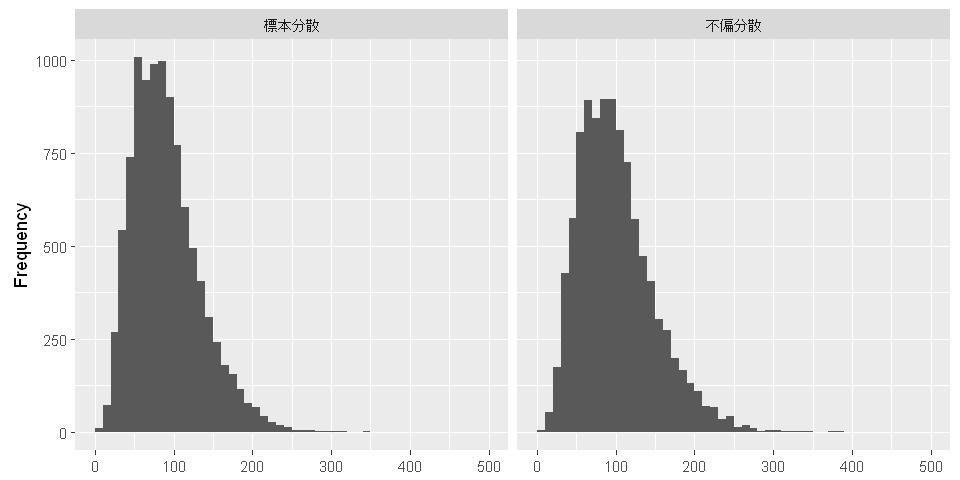

In [28]:
lab <- as_labeller(c(`varps` = "標本分散", `vars` = "不偏分散"))
data.frame(varps, vars) %>>% 
    gather(key, val) %>>% 
    ggplot(aes(val)) + 
        geom_histogram(breaks = seq(0, 500, 10)) + 
        ylab("Frequency") +
        theme(strip.text.x = element_text(family = "IPAexGothic"), axis.title.x = element_blank()) -> gp
Cairo(type = "raster")
gp + facet_wrap(~key, labeller = lab)
dev.off()

In [29]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



* 分散の推定値が200以上

In [30]:
data.frame(varps, vars) %>>% 
    mutate_each(funs(whatever = ifelse(. >= 200, 1, 0))) %>>% 
    rename(標本分散=varps, 不偏分散=vars) %>>%
    gather(key, val) %>>% 
    group_by(key, val) %>>%
    tally %>>%
    spread(val, n)

,key,0,1
1,標本分散,9810,190
2,不偏分散,9619,381


* 不偏分散の平方根は母標準偏差の不偏推定量ではない

In [31]:
sqrt(vars) %>>% mean

[1] 9.753518

### 4.6.2 中央値の標本分布

In [32]:
means <- numeric(length = 10^4)
medians <- numeric(length = 10^4)
for (i in 1:10^4) {
    x <- rnorm(n = 10, mean = 50, sd = 10)
    means[i] <- mean(x)
    medians[i] <- median(x)
}

* 平均

In [33]:
mean(means)

[1] 50.029

In [34]:
mean(medians)

[1] 50.02306

* 標準誤差

In [35]:
sd(means)

[1] 3.191565

In [36]:
sd(medians)

[1] 3.752934

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


pdf 
  2

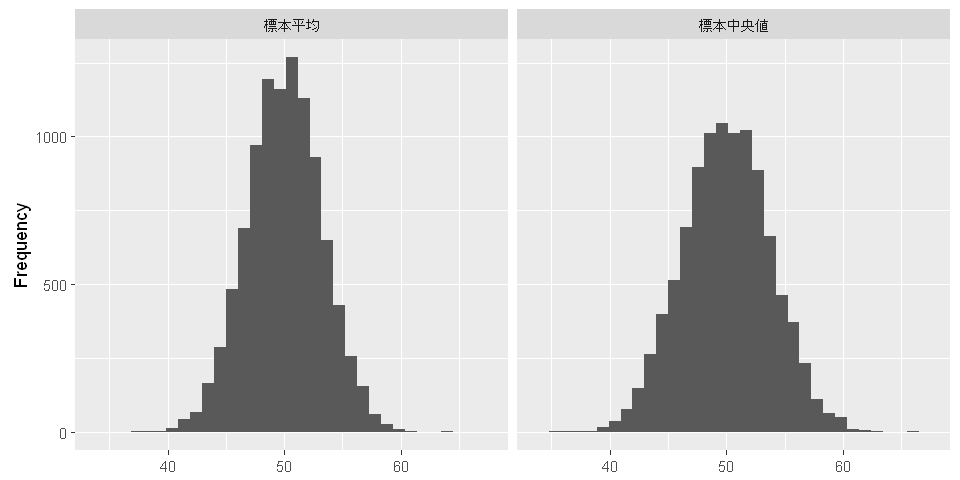

In [37]:
lab <- as_labeller(c(`means` = "標本平均", `medians` = "標本中央値"))
data.frame(means, medians) %>>% 
    gather(key, val) %>>% 
    ggplot(aes(val)) + 
        geom_histogram() + 
        ylab("Frequency") +
        theme(strip.text.x = element_text(family = "IPAexGothic"), axis.title.x = element_blank()) -> gp
Cairo(type = "raster")
gp + facet_wrap(~key, labeller = lab)
dev.off()

## 練習問題

### （1）

In [38]:
sample_means <- numeric(length = 5000)
for(i in 1:5000) {
    x <- rnorm(n = 20, mean = 50, sd = 10)
    sample_means[i] <- mean(x)
}

In [39]:
options(repr.plot.width = 4, repr.plot.height = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


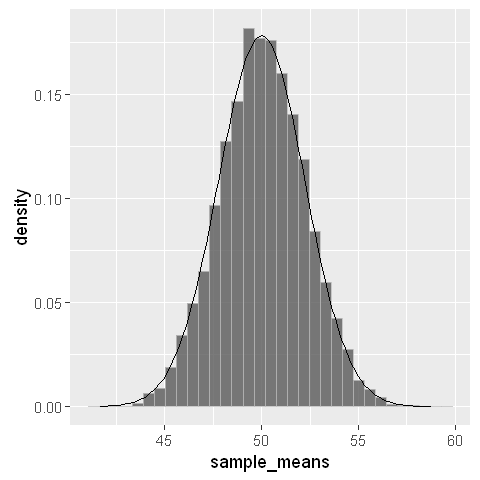

In [40]:
ggplot(data.frame(sample_means), aes(x = sample_means)) + 
    geom_histogram(aes(y = ..density..), col = "gray", alpha = 0.8) + 
    stat_function(fun = dnorm, args = list(mean = 50, sd = sqrt(10^2/20)))

### （2）

In [41]:
library(RColorBrewer)

In [42]:
options(repr.plot.width = 4, repr.plot.height = 8)

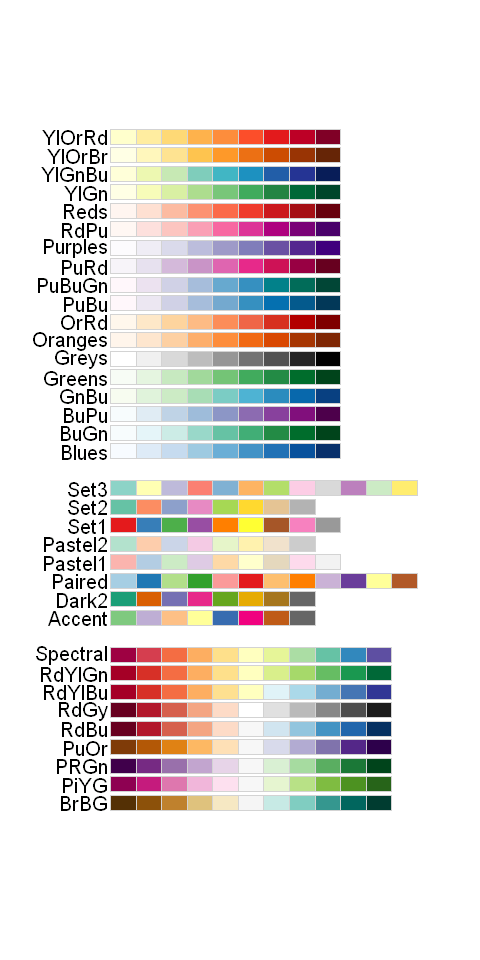

In [43]:
display.brewer.all()

In [44]:
options(repr.plot.width = 4, repr.plot.height = 4)

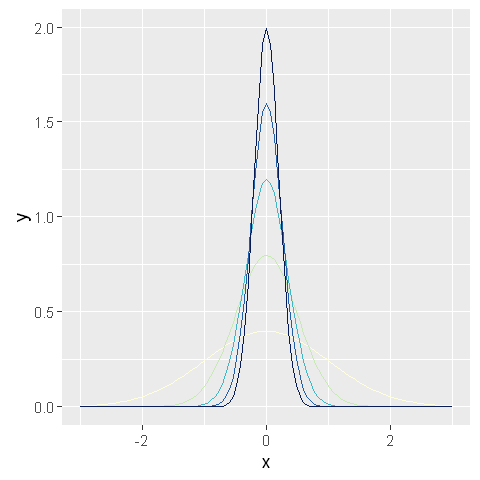

In [45]:
col = brewer.pal(n = 9, name = "YlGnBu")
ggplot(data.frame(x = c(-3, 3)), aes(x)) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = sqrt(1/1)), col = col[1]) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = sqrt(1/4)), col = col[3]) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = sqrt(1/9)), col = col[5]) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = sqrt(1/16)), col = col[7]) + 
    stat_function(fun = dnorm, args = list(mean = 0, sd = sqrt(1/25)), col = col[9]) 

In [46]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-05-16                  

 package      * version date       source                            
 assertthat     0.1     2013-12-06 CRAN (R 3.2.1)                    
 base64enc      0.1-3   2015-07-28 CRAN (R 3.2.2)                    
 Cairo        * 1.5-9   2015-09-26 CRAN (R 3.2.2)                    
 colorspace     1.2-6   2015-03-11 CRAN (R 3.2.1)                    
 DBI            0.3.1   2014-09-24 CRAN (R 3.2.1)                    
 devtools       1.10.0  2016-01-23 CRAN (R 3.2.3)                    
 digest         0.6.9   2016-01-08 CRAN (R 3.2.3)                    
 dplyr        * 0.4.3   2015-09-01 CRAN (R 3.2.2)                    
 evaluate       0.8     2015-09-18 CRAN (R 3.2.2)        